In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


   # Data preparation and descriptive statistics

First, let's load the data

It was already prepared with the following steps : 

- Select relevant features (= features that measure numerically an ability in football - for instance number of yellow cards were not kept because it is not evident that higher or lower number of cards defines a better player)


- Compute all statistics per 90 minutes played in order to have a fair comparison between individuals 

- Remove all players that played less than full 180 minutes ( 2 games) which means a lot players that only played in group stage were excluded due to lack of data

- Remove players that had missing values 

In [3]:
players = pd.read_csv('../data/clean_data/players_performance.csv')
players = round(players,2)
players.head()

,ranker,player,position,team,age_at_season_start,age_category,club,birth_year,minutes,minutes_90s,...,blocks_per90,clearances_per90,touches_per90,dribbles_completed_per90,dribbles_completed_pct,shots_on_target_pct,shots_on_target_per90,goals_per_shot,average_shot_distance,npxg_per_shot
0,1,Aaron Mooy,MF,Australia,32,Confirmed,Celtic,1990,360,4.0,...,1.50,2.25,63.75,0.50,66.7,0.0,0.00,0.0,29.1,0.05
1,2,Aaron Ramsey,MF,Wales,31,Confirmed,Nice,1990,266,3.0,...,1.33,0.67,49.00,0.67,25.0,0.0,0.00,0.0,18.0,0.04
2,3,Abdelhamid Sabiri,MF,Morocco,26,Youngster,Sampdoria,1996,181,2.0,...,1.50,1.50,43.00,0.00,0.0,0.0,0.00,0.0,34.2,0.04
3,4,Abdelkarim Hassan,DF,Qatar,29,Confirmed,Al Sadd SC,1993,270,3.0,...,1.00,1.67,64.33,0.33,20.0,0.0,0.00,0.0,23.6,0.05
4,9,Abdulaziz Hatem,MF,Qatar,32,Confirmed,Al Rayyan SC,1990,196,2.2,...,0.00,0.00,44.55,0.45,100.0,100.0,0.46,0.0,27.4,0.02


We are kept with 219 players, and 44 features ( i don't include the features ranker was used to merge different dataset in the count) without missing values as seen below :

In [4]:
players.describe()

,ranker,age_at_season_start,birth_year,minutes,minutes_90s,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,...,blocks_per90,clearances_per90,touches_per90,dribbles_completed_per90,dribbles_completed_pct,shots_on_target_pct,shots_on_target_per90,goals_per_shot,average_shot_distance,npxg_per_shot
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,344.589041,27.073059,1994.890411,313.990868,3.488128,0.151872,0.121872,0.273836,0.131553,0.253607,...,1.107443,1.381826,55.877854,0.651689,38.606849,31.718721,0.428584,0.111826,18.691324,0.103790
std,200.584799,3.914705,3.913849,117.438721,1.308212,0.255132,0.203760,0.344897,0.227185,0.320956,...,0.682829,1.339605,18.978475,0.802015,31.424961,30.151230,0.471446,0.217020,7.105707,0.106813
min,1.000000,18.000000,1983.000000,179.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.010000
25%,171.000000,24.000000,1992.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.365000,41.000000,0.165000,12.200000,0.000000,0.000000,0.000000,13.950000,0.040000
50%,334.000000,27.000000,1995.000000,270.000000,3.000000,0.000000,0.000000,0.210000,0.000000,0.140000,...,1.000000,1.000000,54.430000,0.430000,36.400000,33.300000,0.330000,0.000000,17.700000,0.080000
75%,532.500000,30.000000,1998.000000,360.000000,4.000000,0.280000,0.250000,0.415000,0.250000,0.395000,...,1.500000,1.970000,67.285000,0.850000,50.000000,50.000000,0.610000,0.140000,23.200000,0.130000
max,680.000000,39.000000,2004.000000,690.000000,7.700000,1.460000,0.950000,1.950000,1.460000,1.950000,...,3.210000,6.670000,135.170000,6.550000,100.000000,100.000000,2.430000,1.000000,46.600000,0.950000


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ranker                             219 non-null    int64  
 1   player                             219 non-null    object 
 2   position                           219 non-null    object 
 3   team                               219 non-null    object 
 4   age_at_season_start                219 non-null    int64  
 5   age_category                       219 non-null    object 
 6   club                               219 non-null    object 
 7   birth_year                         219 non-null    int64  
 8   minutes                            219 non-null    int64  
 9   minutes_90s                        219 non-null    float64
 10  goals_per90                        219 non-null    float64
 11  assists_per90                      219 non-null    float64

# Analysis of numerical features 

Let's filter numerical data and check correlation matrix as well as distribution variables :

In [6]:
numericals_columns = [i for i in players.select_dtypes(include = ['int64','float64']).columns if i not in ['ranker','minutes']]


players_numerical_df = players[numericals_columns]


<Axes: >

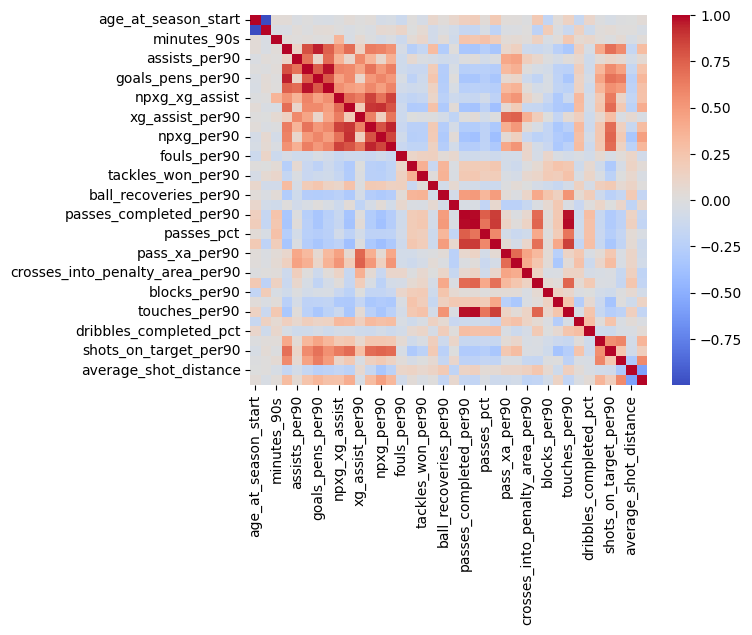

In [7]:
sns.heatmap(players_numerical_df.corr(),cmap='coolwarm')

A lot of features are highly correlated and some are not correlated or slightly negatively correlated.

It could be interesting to do a PCA to reduce the number of features and see what percentage of variance coould be explained by the first axes

----- Distribution of age_at_season_start : -----


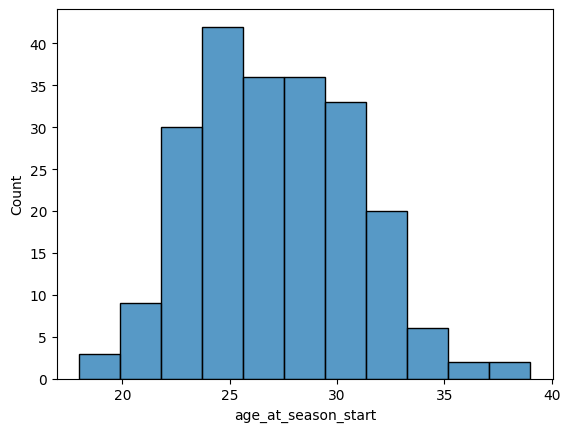

----- Distribution of birth_year : -----


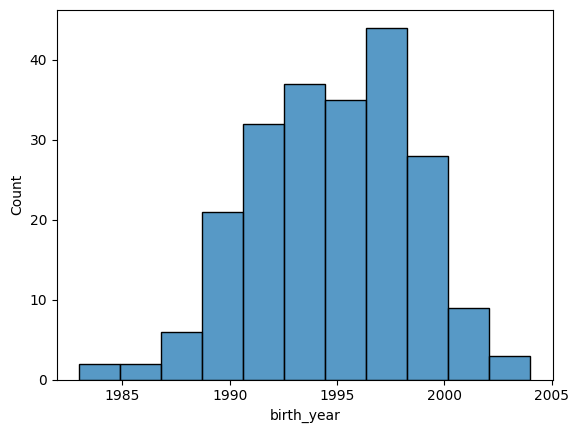

----- Distribution of minutes_90s : -----


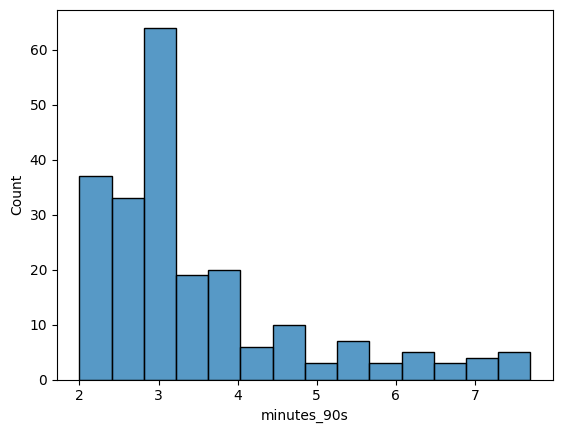

----- Distribution of goals_per90 : -----


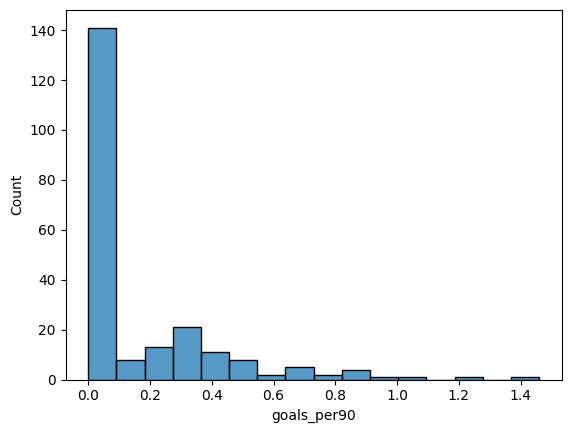

----- Distribution of assists_per90 : -----


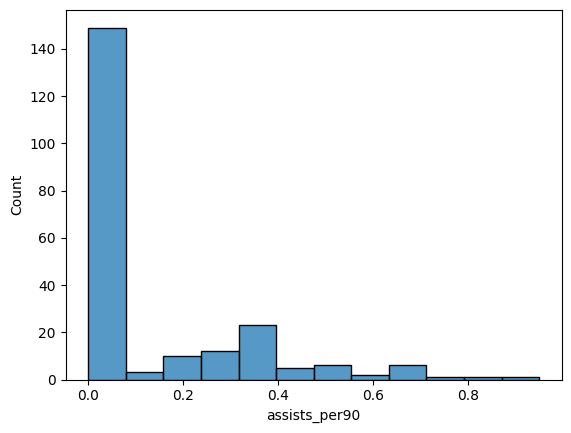

----- Distribution of goals_assists_per90 : -----


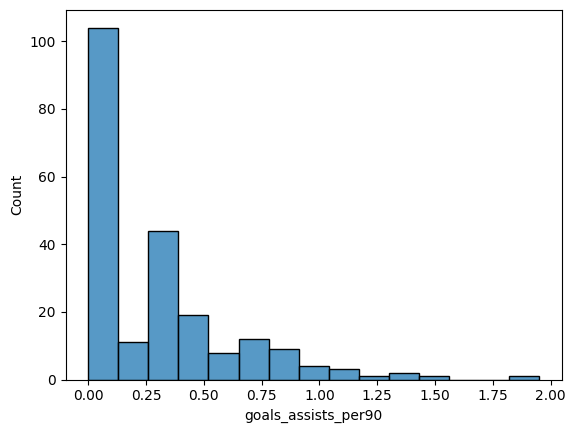

----- Distribution of goals_pens_per90 : -----


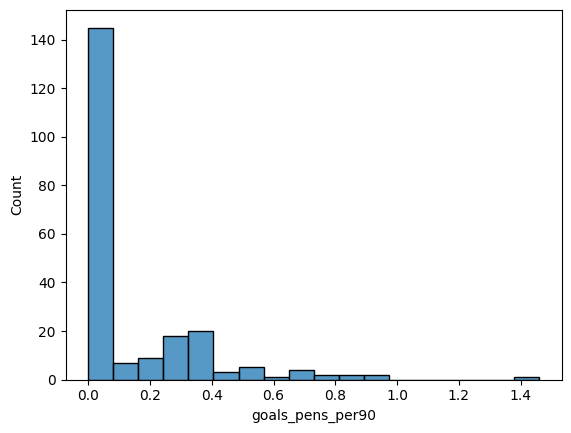

----- Distribution of goals_assists_pens_per90 : -----


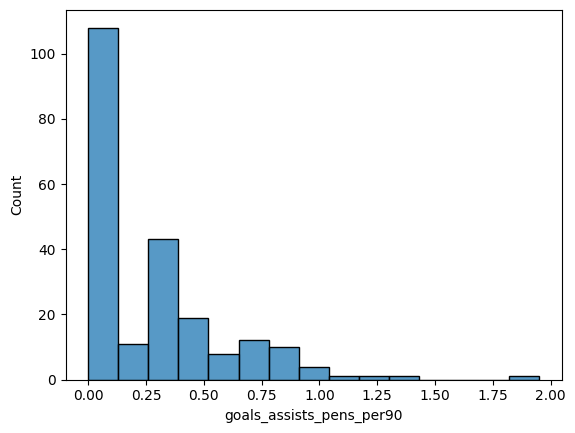

----- Distribution of npxg_xg_assist : -----


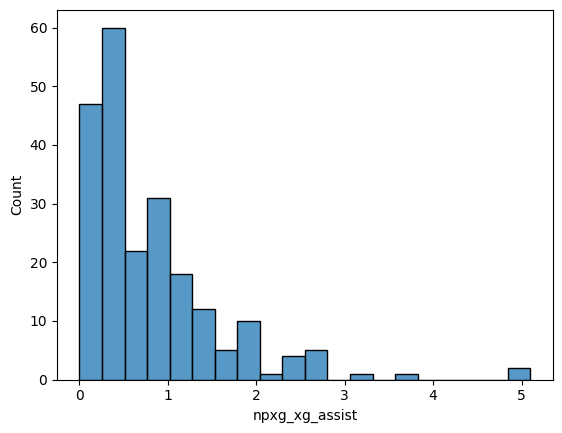

----- Distribution of xg_per90 : -----


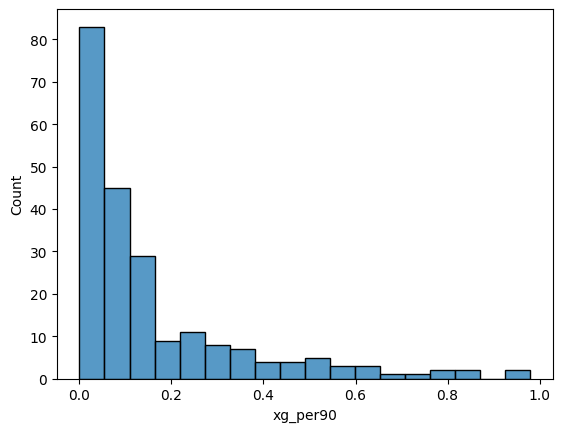

----- Distribution of xg_assist_per90 : -----


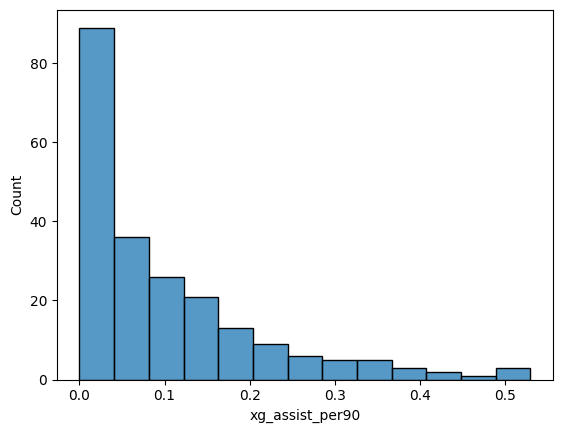

----- Distribution of xg_xg_assist_per90 : -----


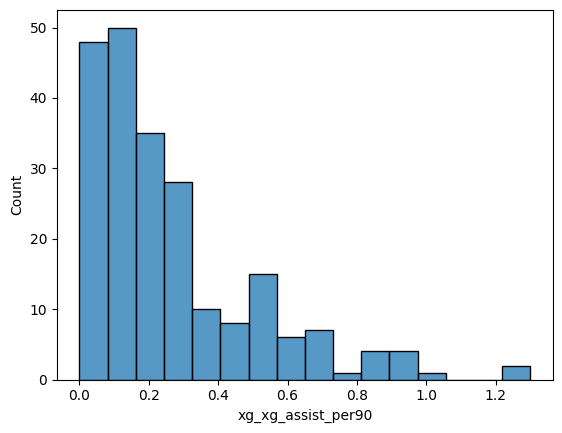

----- Distribution of npxg_per90 : -----


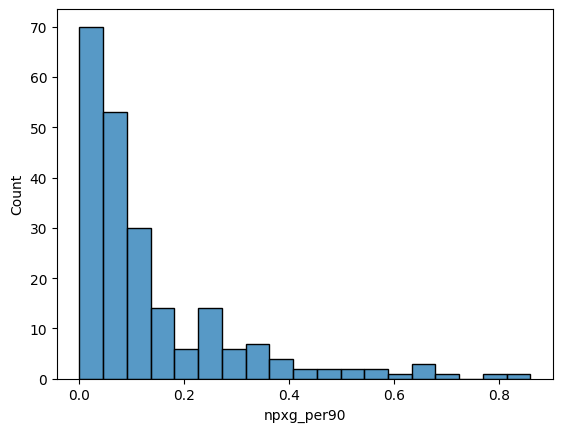

----- Distribution of npxg_xg_assist_per90 : -----


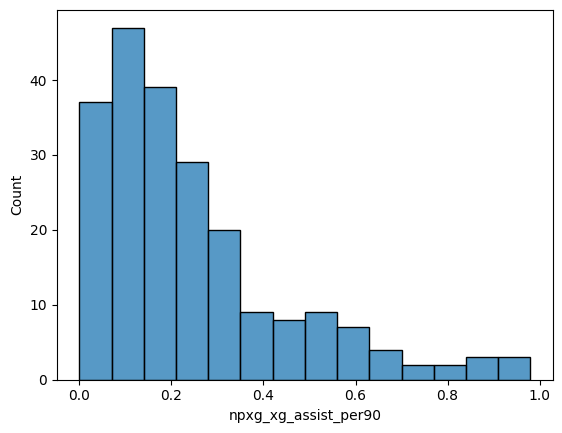

----- Distribution of fouls_per90 : -----


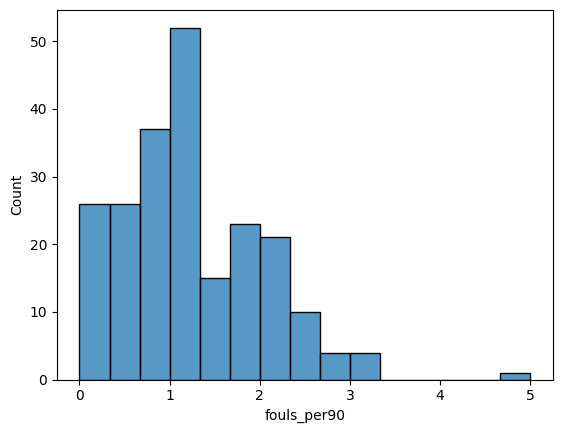

----- Distribution of interceptions_per90 : -----


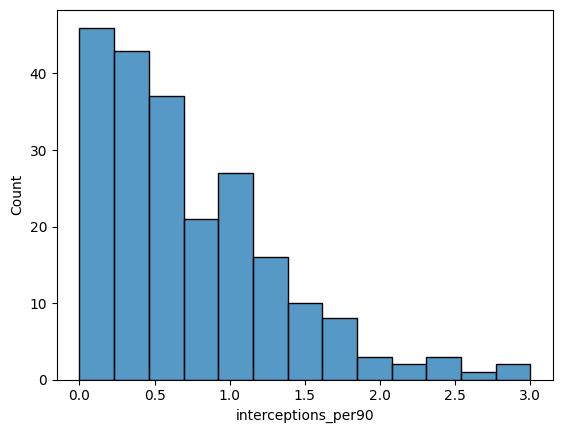

----- Distribution of tackles_won_per90 : -----


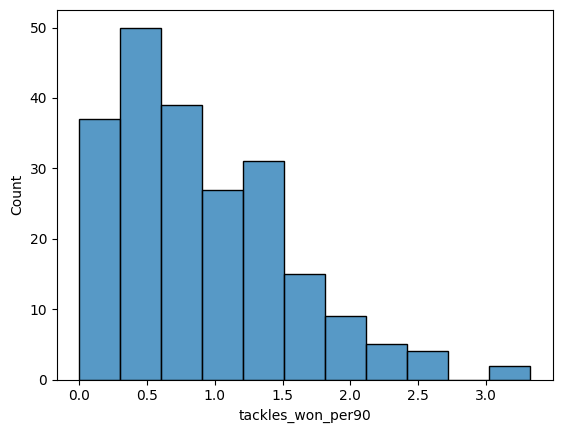

----- Distribution of pens_won_per90 : -----


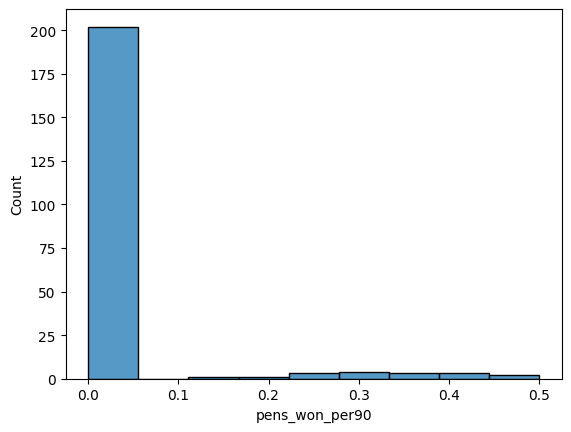

----- Distribution of ball_recoveries_per90 : -----


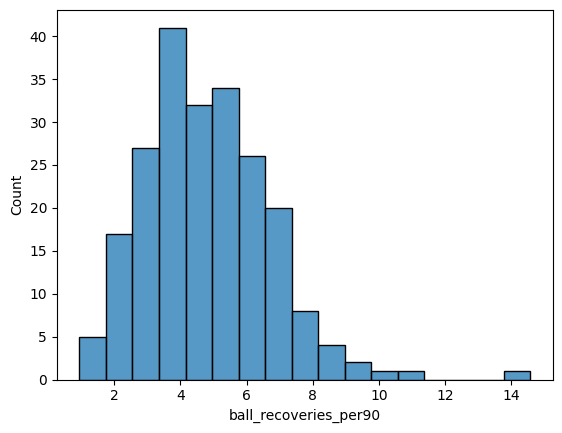

----- Distribution of aerials_won_per90 : -----


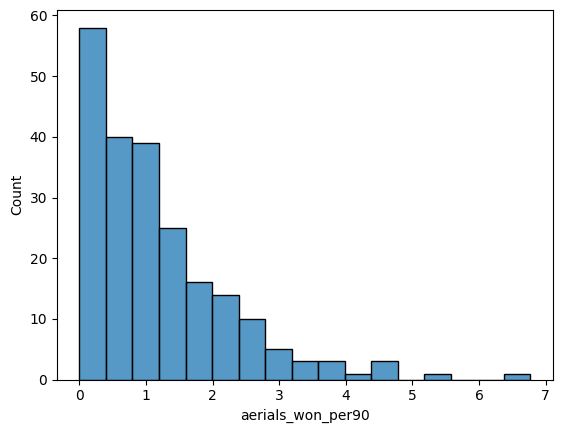

----- Distribution of passes_completed_per90 : -----


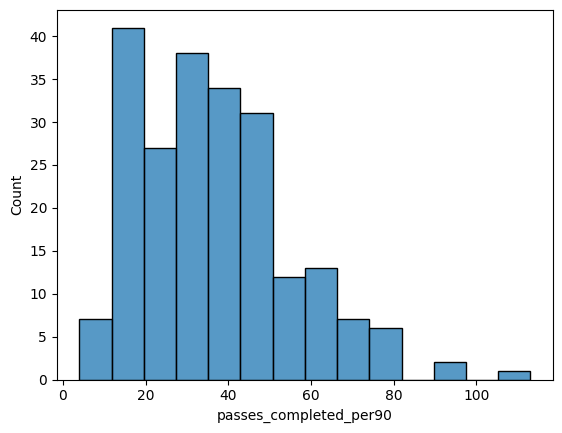

----- Distribution of passes_per90 : -----


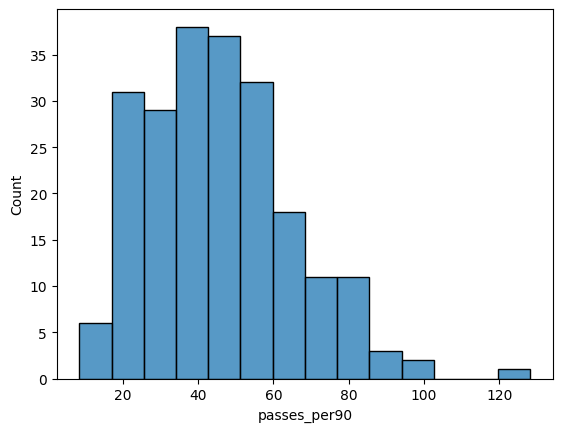

----- Distribution of passes_pct : -----


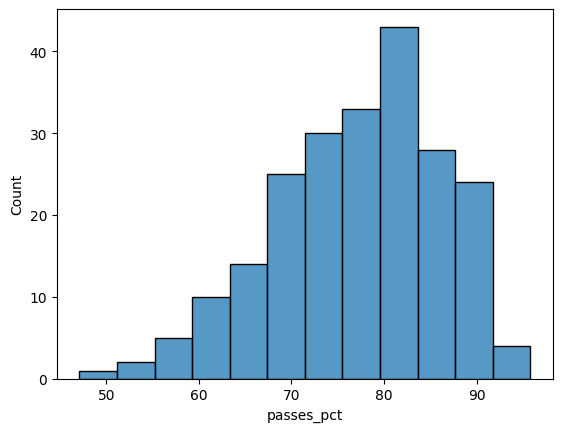

----- Distribution of passes_progressive_distance_per90 : -----


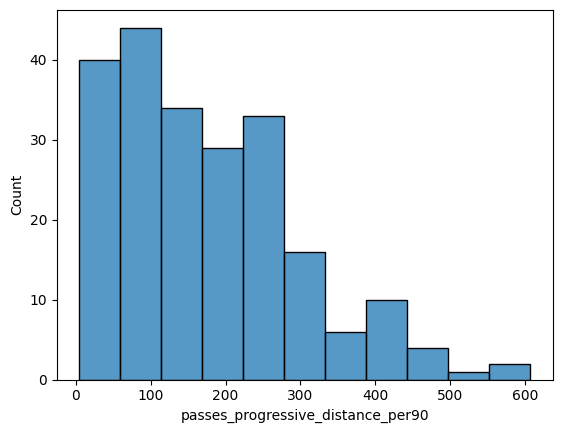

----- Distribution of pass_xa_per90 : -----


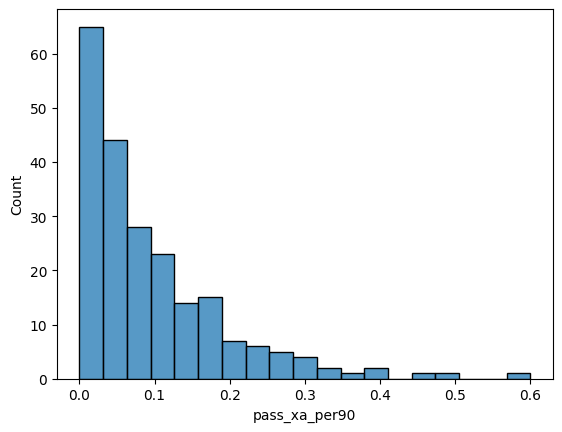

----- Distribution of assisted_shots_per90 : -----


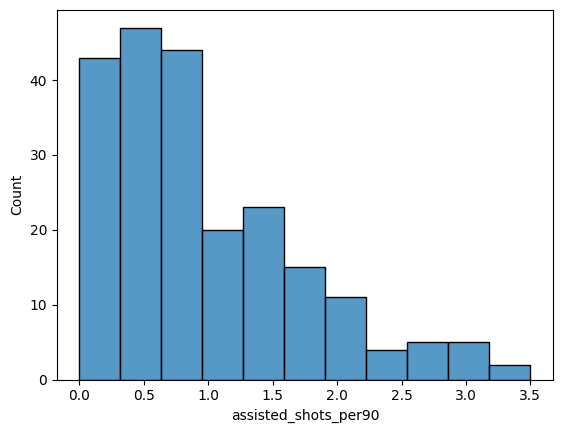

----- Distribution of crosses_into_penalty_area_per90 : -----


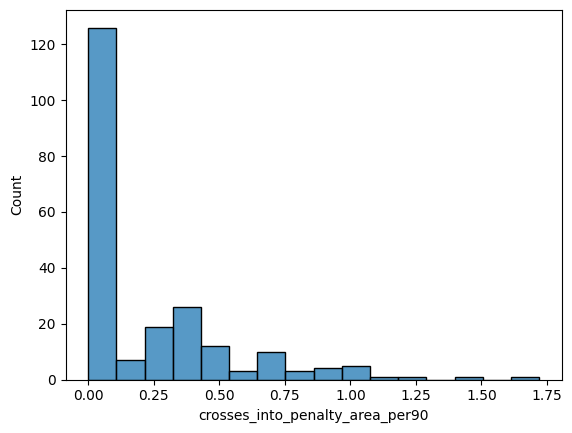

----- Distribution of progressive_passes_per_90 : -----


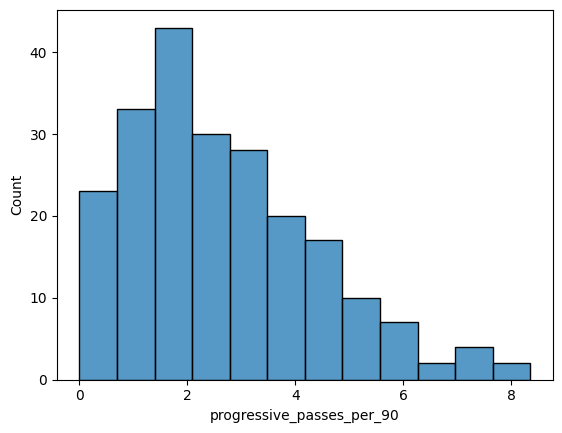

----- Distribution of blocks_per90 : -----


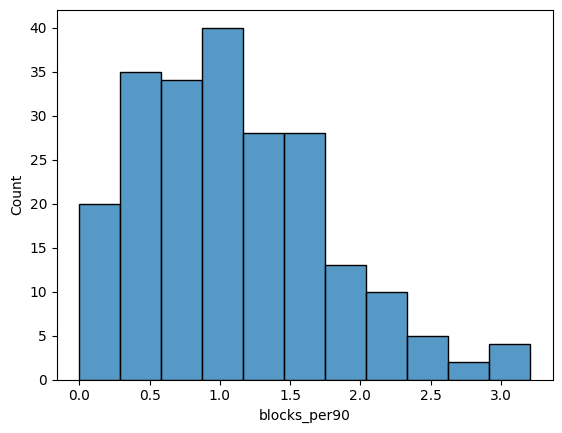

----- Distribution of clearances_per90 : -----


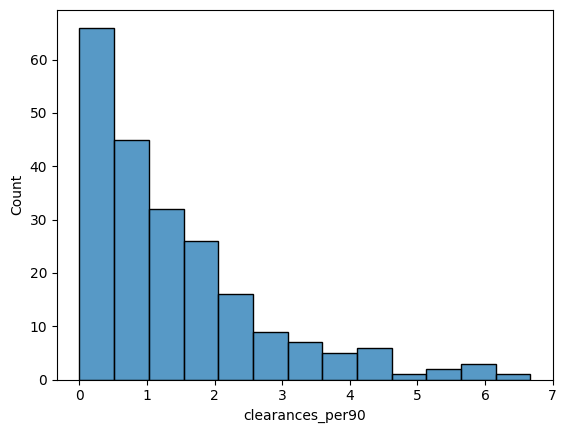

----- Distribution of touches_per90 : -----


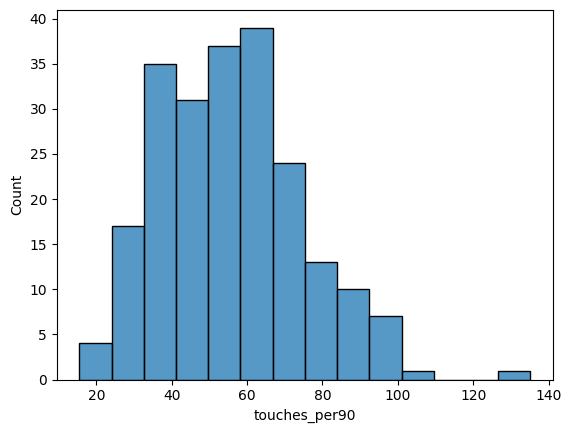

----- Distribution of dribbles_completed_per90 : -----


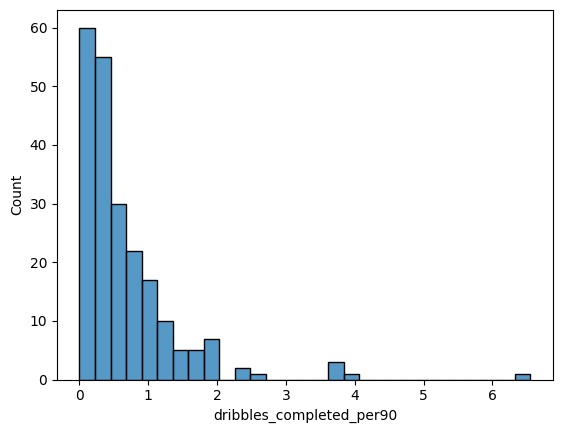

----- Distribution of dribbles_completed_pct : -----


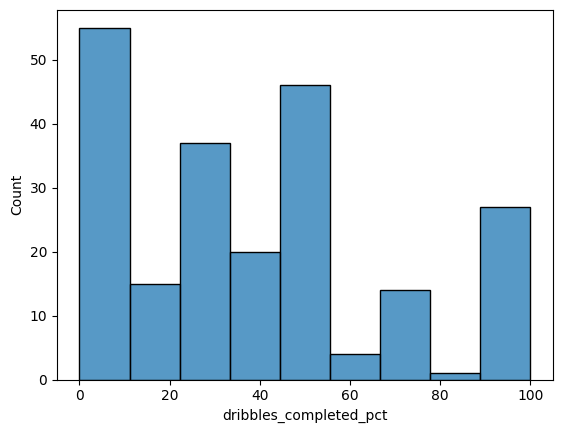

----- Distribution of shots_on_target_pct : -----


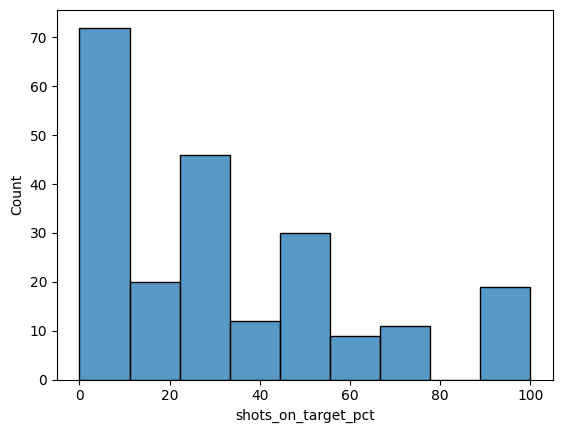

----- Distribution of shots_on_target_per90 : -----


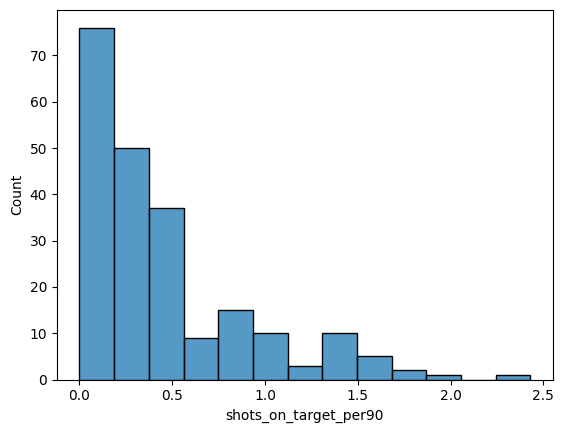

----- Distribution of goals_per_shot : -----


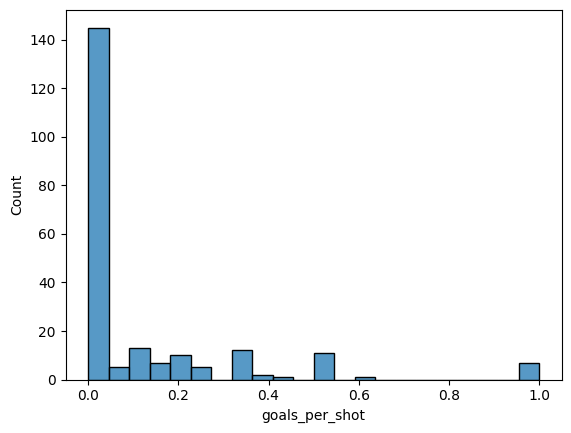

----- Distribution of average_shot_distance : -----


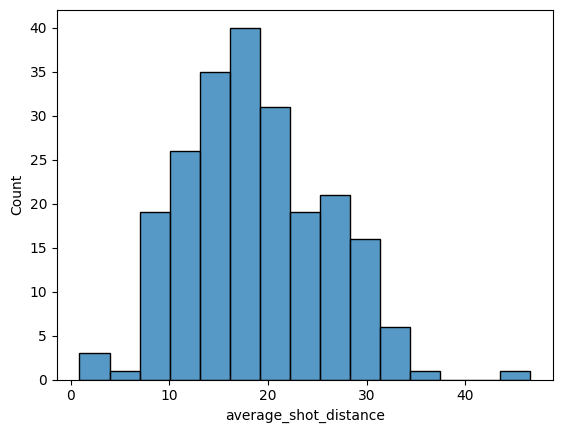

----- Distribution of npxg_per_shot : -----


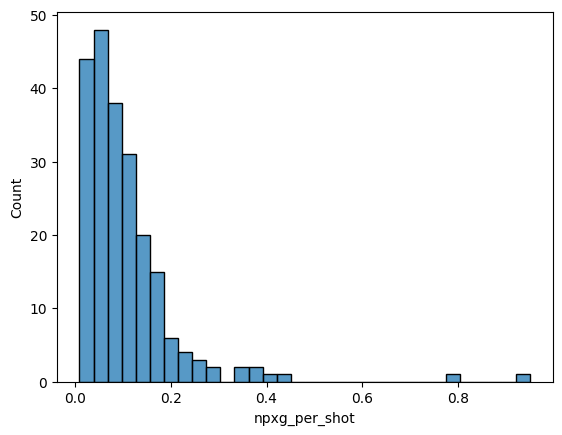

In [8]:
for variable in players_numerical_df.columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(players_numerical_df[variable])
    plt.show()

Unsuprisingly, age features are normally distributed.

All other features are strongly right skewed, except pass percentage which is left skewed.
This indicates a lot of players performing quite pourly and some players performing extremingly well

# PCA and clustering

To do a PCA we need to standardize the data. 

Howerer we saw that most data was not centered, let's transform these features with a squared root transform first 

In [9]:
#list of uncentered data to transform :

ls = [i for i in players.select_dtypes(include = ['int64','float64']).columns if i not in ['ranker','minutes','age_at_season_start','birth_year']]


['minutes_90s',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90',
 'fouls_per90',
 'interceptions_per90',
 'tackles_won_per90',
 'pens_won_per90',
 'ball_recoveries_per90',
 'aerials_won_per90',
 'passes_completed_per90',
 'passes_per90',
 'passes_pct',
 'passes_progressive_distance_per90',
 'pass_xa_per90',
 'assisted_shots_per90',
 'crosses_into_penalty_area_per90',
 'progressive_passes_per_90',
 'blocks_per90',
 'clearances_per90',
 'touches_per90',
 'dribbles_completed_per90',
 'dribbles_completed_pct',
 'shots_on_target_pct',
 'shots_on_target_per90',
 'goals_per_shot',
 'average_shot_distance',
 'npxg_per_shot']

In [10]:
for feature in ls :
    players[[feature]] = np.sqrt(players[[feature]])

----- Distribution of npxg_per_shot : -----


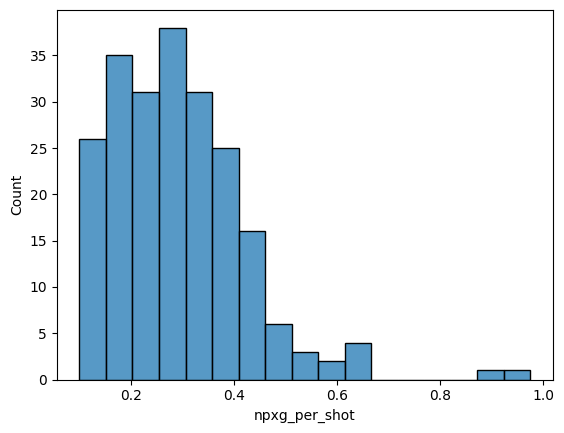

----- Distribution of npxg_per_shot : -----


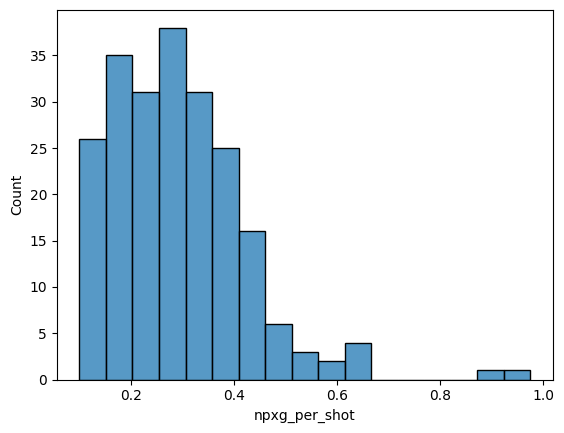

----- Distribution of npxg_per_shot : -----


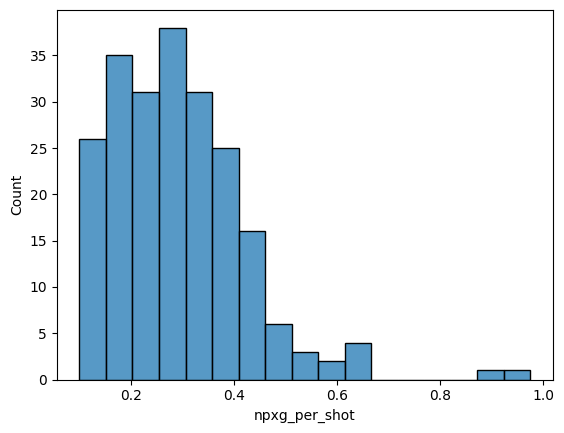

----- Distribution of npxg_per_shot : -----


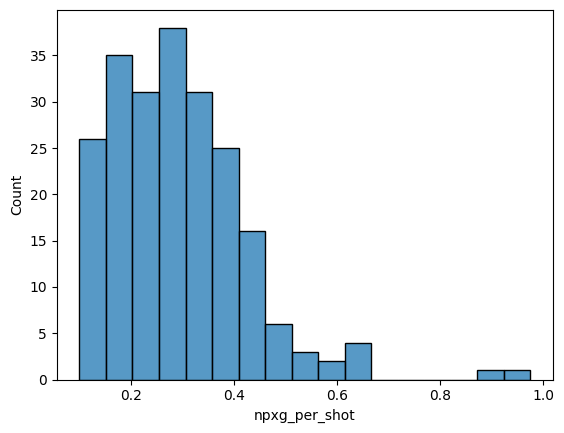

----- Distribution of npxg_per_shot : -----


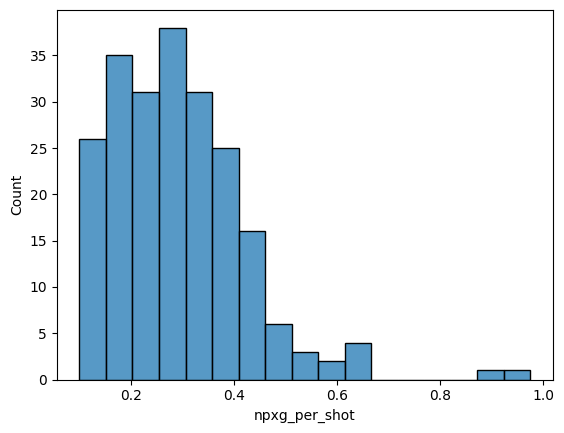

----- Distribution of npxg_per_shot : -----


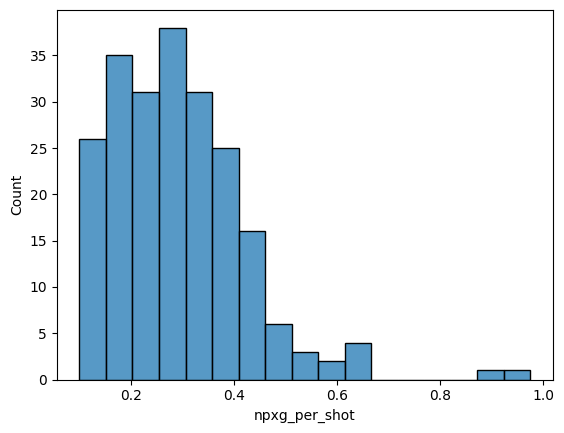

----- Distribution of npxg_per_shot : -----


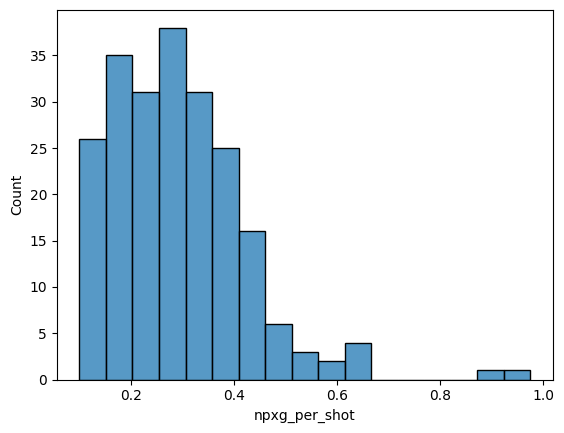

----- Distribution of npxg_per_shot : -----


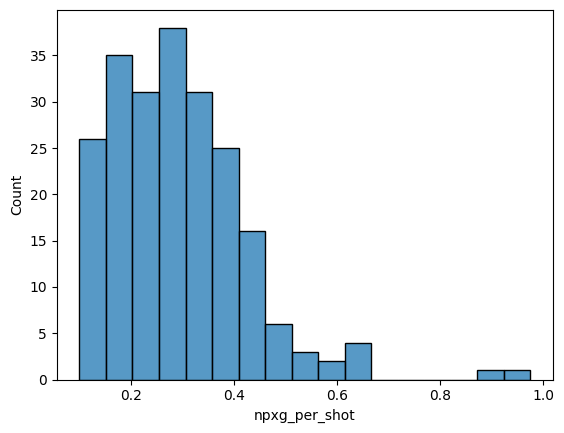

----- Distribution of npxg_per_shot : -----


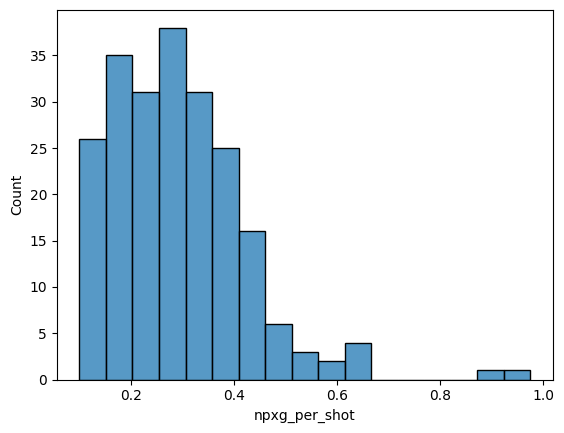

----- Distribution of npxg_per_shot : -----


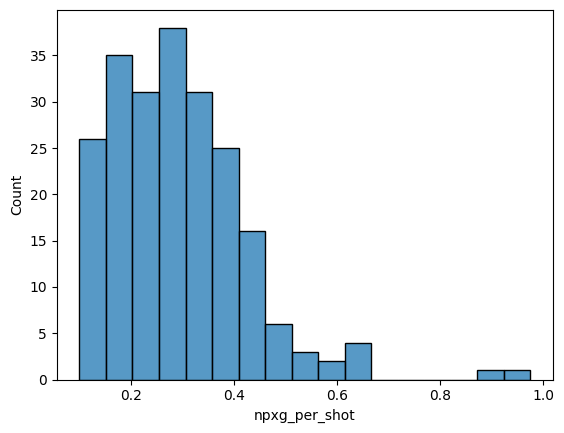

----- Distribution of npxg_per_shot : -----


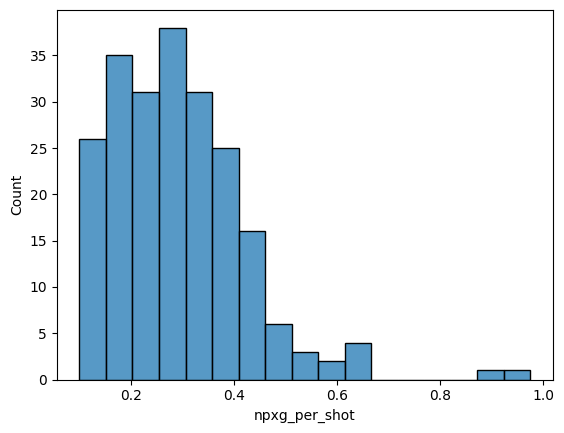

----- Distribution of npxg_per_shot : -----


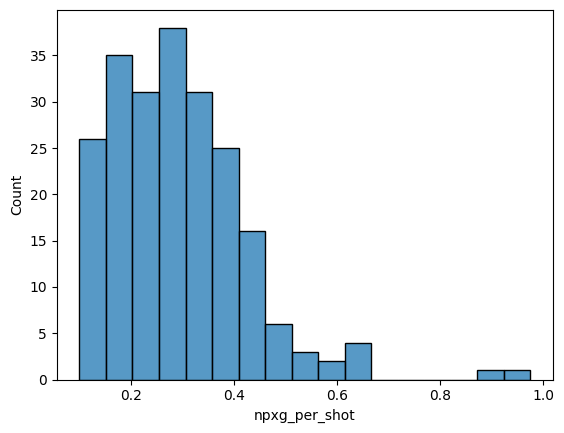

----- Distribution of npxg_per_shot : -----


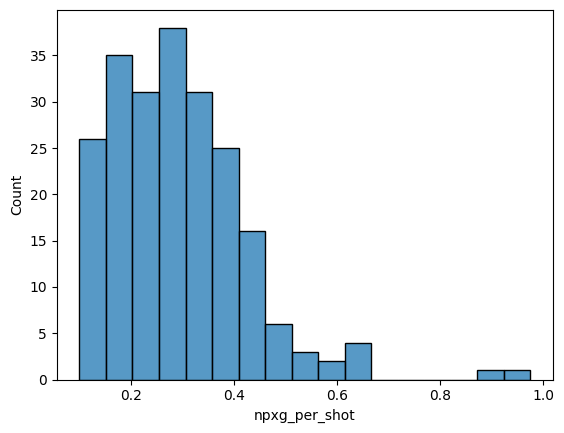

----- Distribution of npxg_per_shot : -----


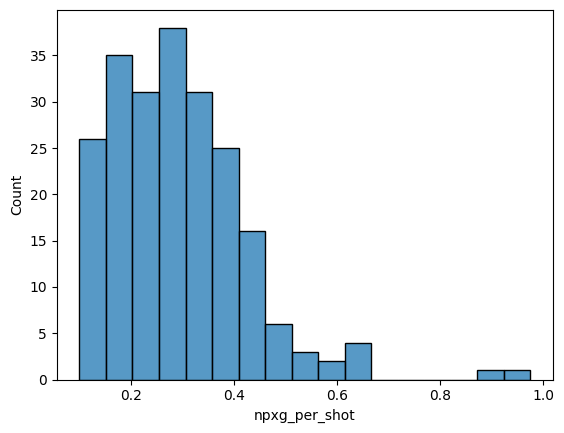

----- Distribution of npxg_per_shot : -----


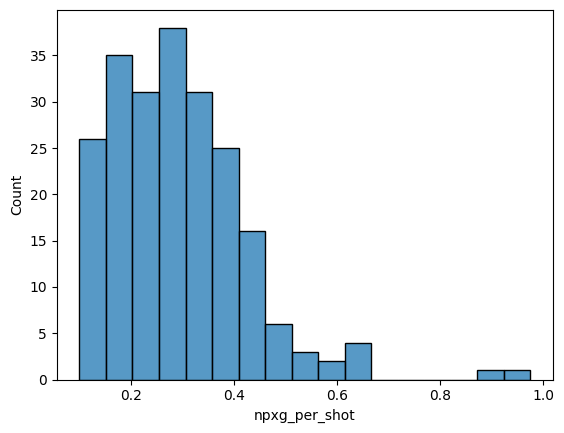

----- Distribution of npxg_per_shot : -----


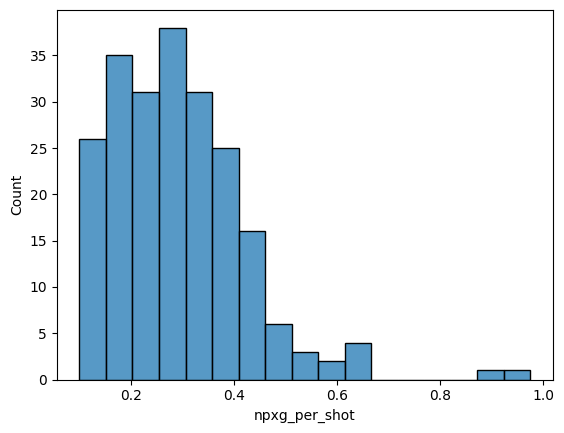

----- Distribution of npxg_per_shot : -----


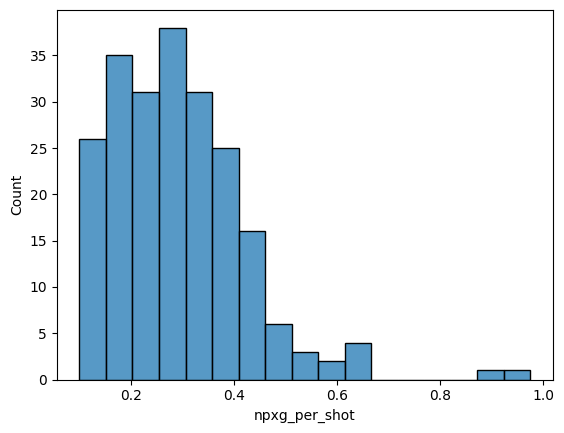

----- Distribution of npxg_per_shot : -----


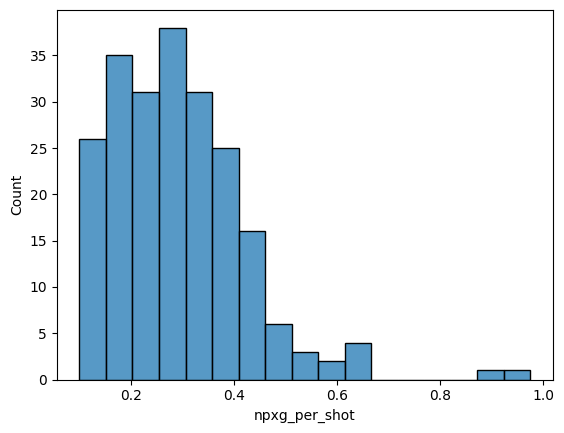

----- Distribution of npxg_per_shot : -----


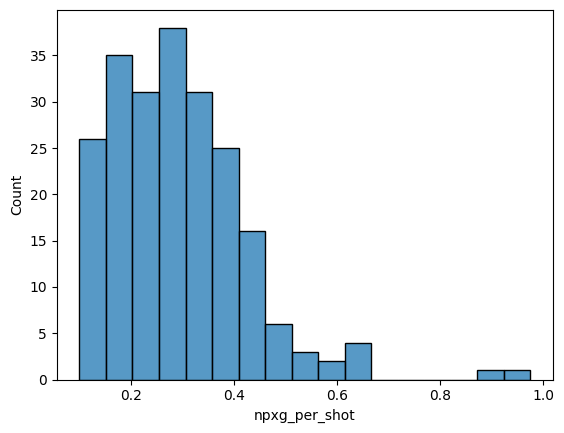

----- Distribution of npxg_per_shot : -----


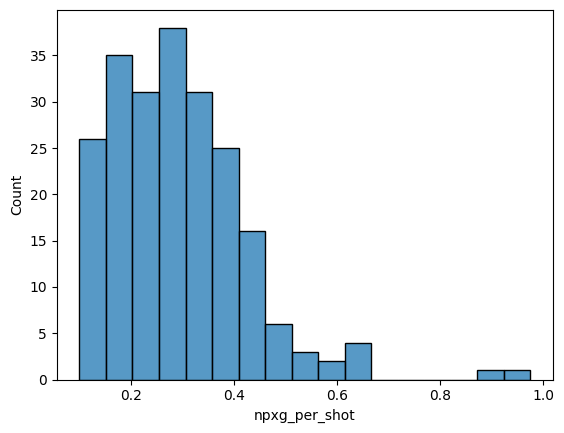

----- Distribution of npxg_per_shot : -----


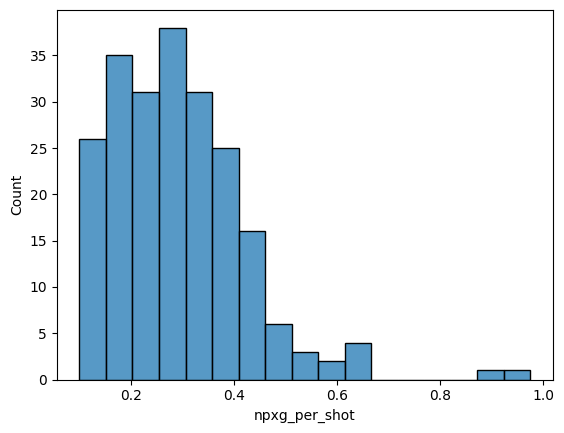

----- Distribution of npxg_per_shot : -----


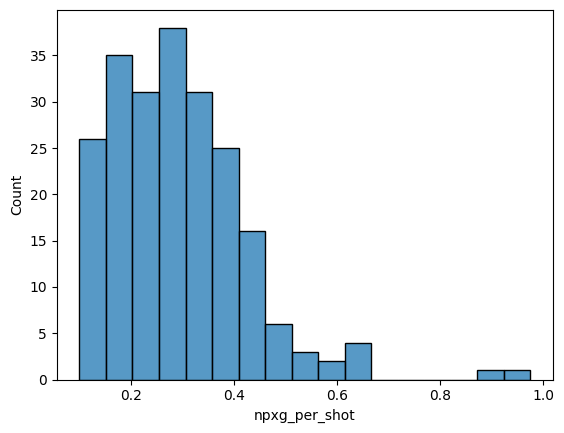

----- Distribution of npxg_per_shot : -----


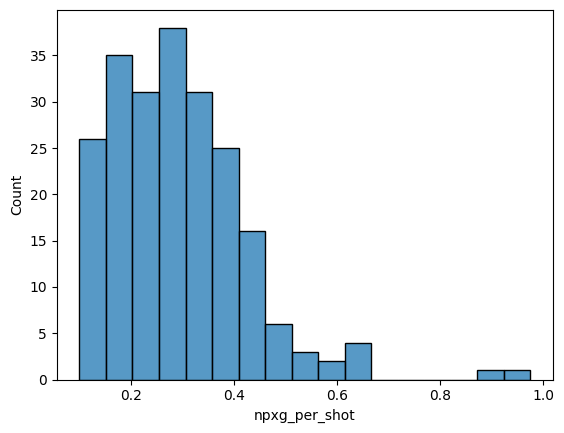

----- Distribution of npxg_per_shot : -----


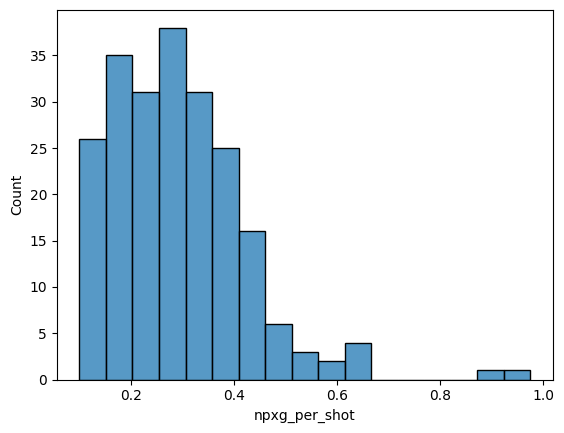

----- Distribution of npxg_per_shot : -----


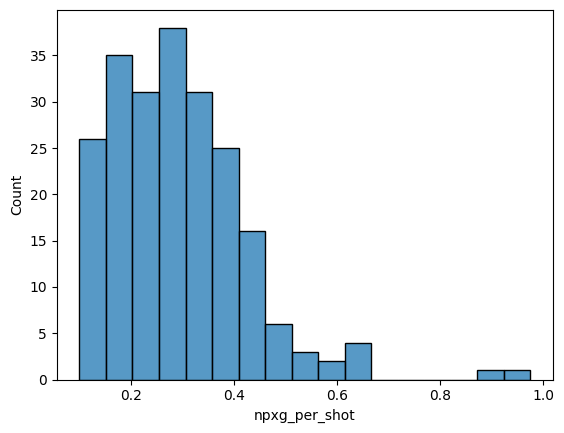

----- Distribution of npxg_per_shot : -----


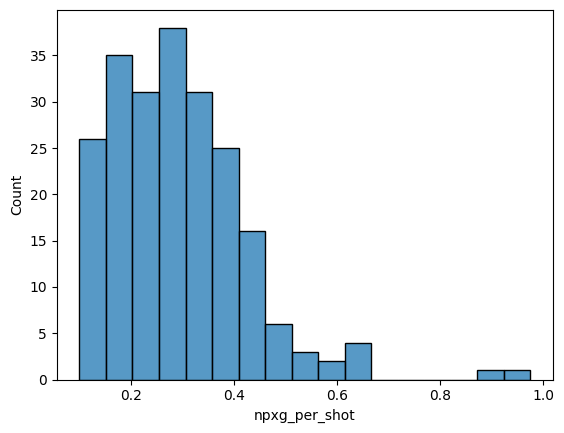

----- Distribution of npxg_per_shot : -----


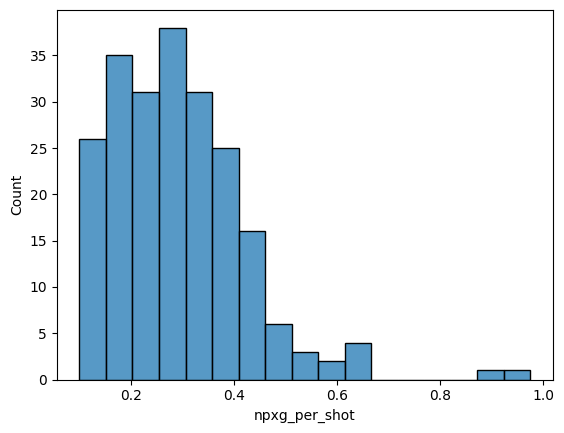

----- Distribution of npxg_per_shot : -----


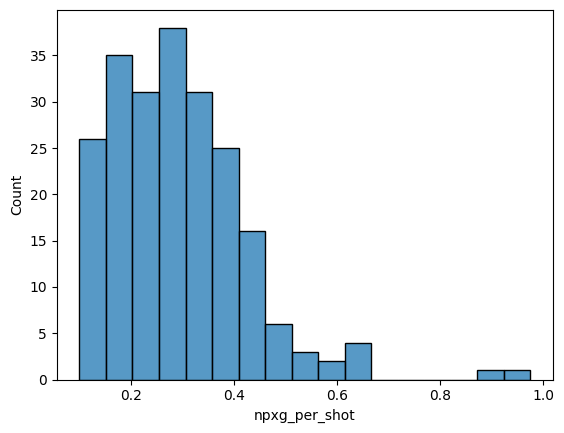

----- Distribution of npxg_per_shot : -----


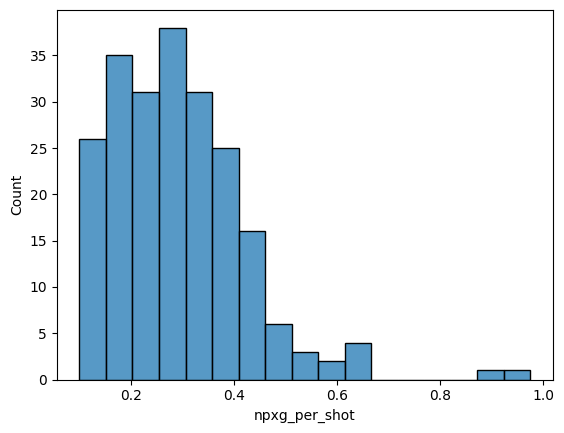

----- Distribution of npxg_per_shot : -----


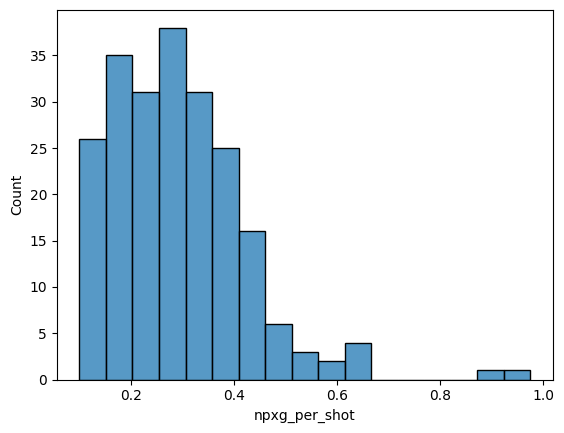

----- Distribution of npxg_per_shot : -----


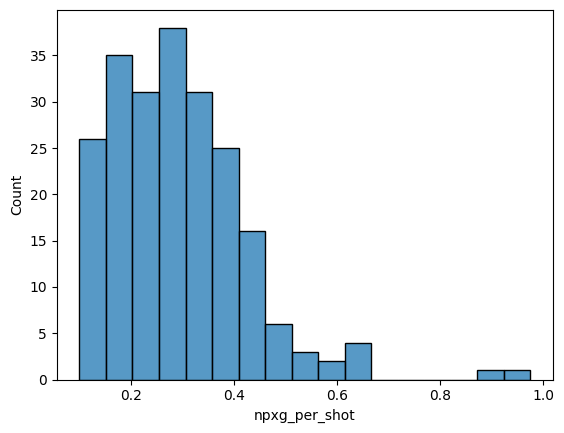

----- Distribution of npxg_per_shot : -----


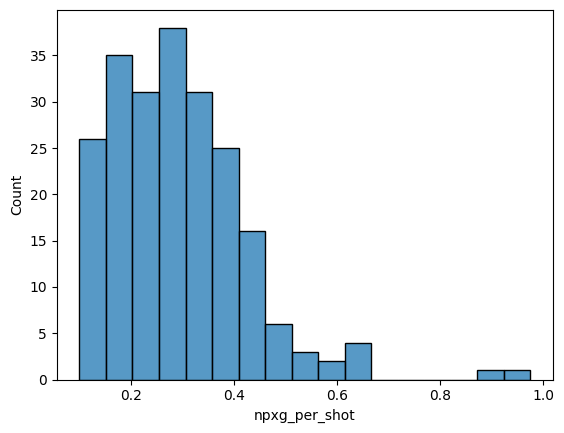

----- Distribution of npxg_per_shot : -----


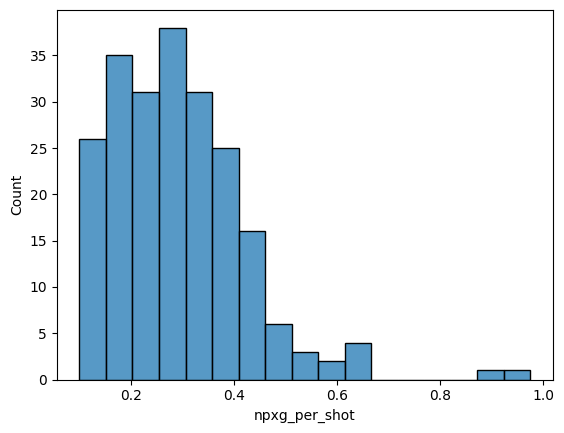

----- Distribution of npxg_per_shot : -----


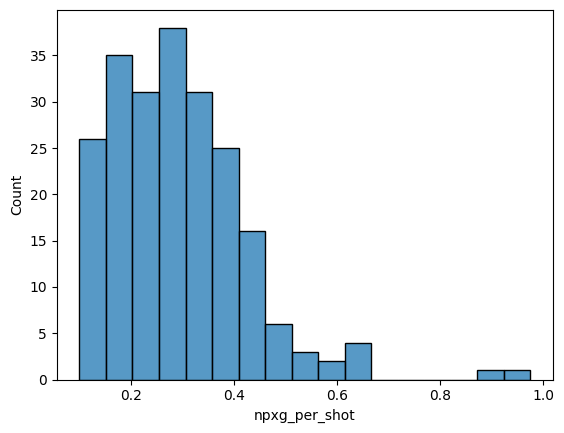

----- Distribution of npxg_per_shot : -----


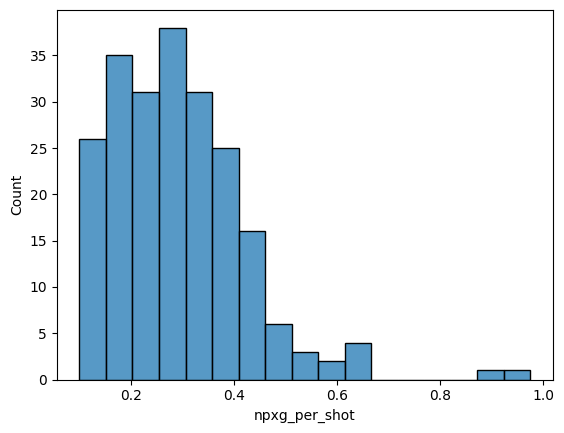

----- Distribution of npxg_per_shot : -----


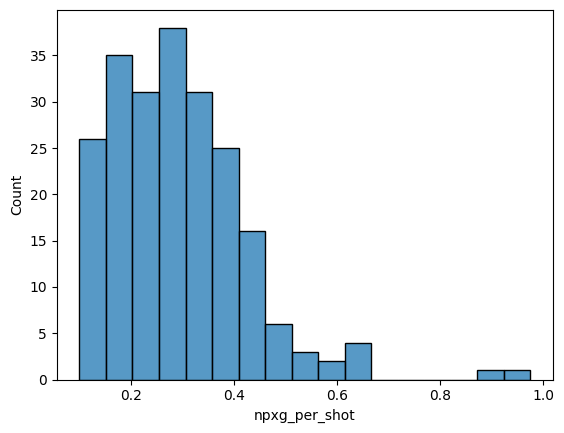

In [11]:
for feature in ls :
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(players[variable])
    plt.show()

Data is better centered. Now let's standardize with sk-learn library : 

In [18]:
df_to_transform = players[ls]

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_to_transform)
df_to_transform = pd.DataFrame(scaler.transform(df_to_transform), columns=ls)

Now, let's check and visualize different principal components in term of variance explained using PCA

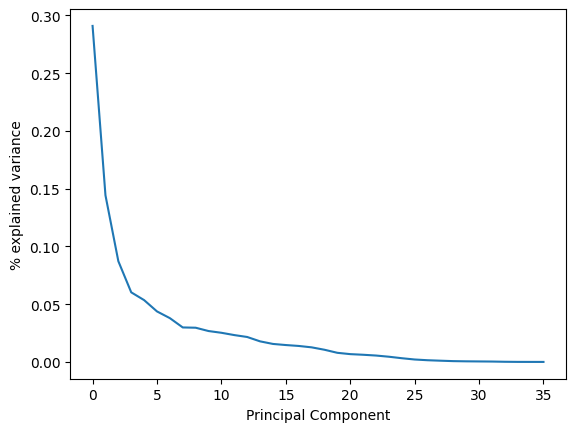

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_to_transform)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

Almost half of variance is explained by the two first principal components : 

Let's visualize a scatter plot of the two first PCs

In [41]:
X_proj = pca.transform(df_to_transform)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 37)])


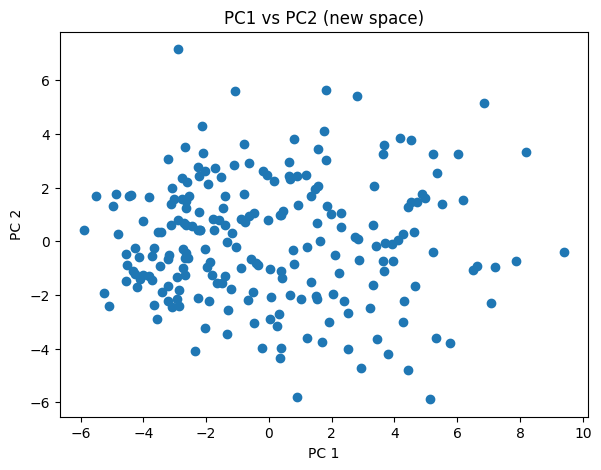

In [40]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

Now, let's try and find optimum clusters on projected data :

/Users/louispinot/.pyenv/versions/world-cup/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



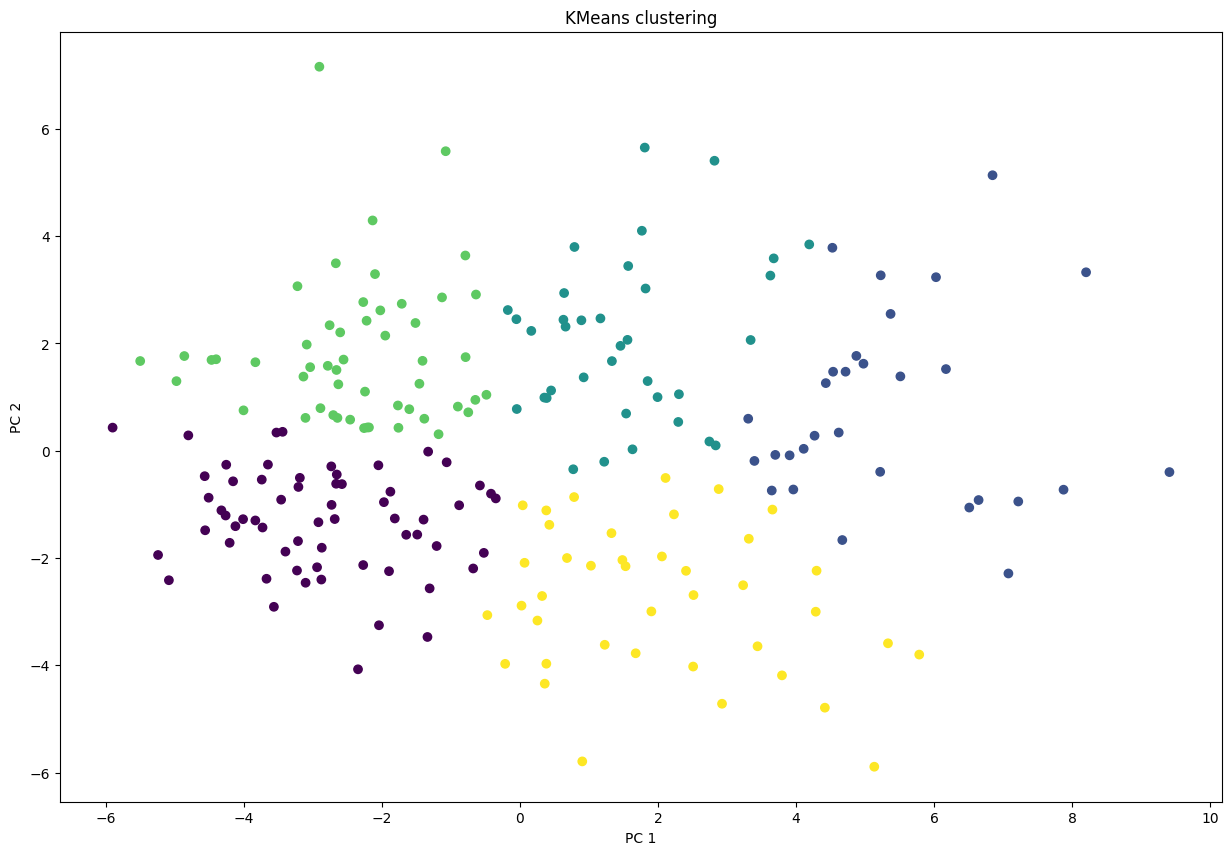

In [149]:
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (15,10)

# Fit K-means
km = KMeans(n_clusters=5)
km.fit(X_proj[['PC1','PC2']])
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

Are we able to have an interpretation of what separates these groups ? Let's check what features are strongly correlated to the first PCs:

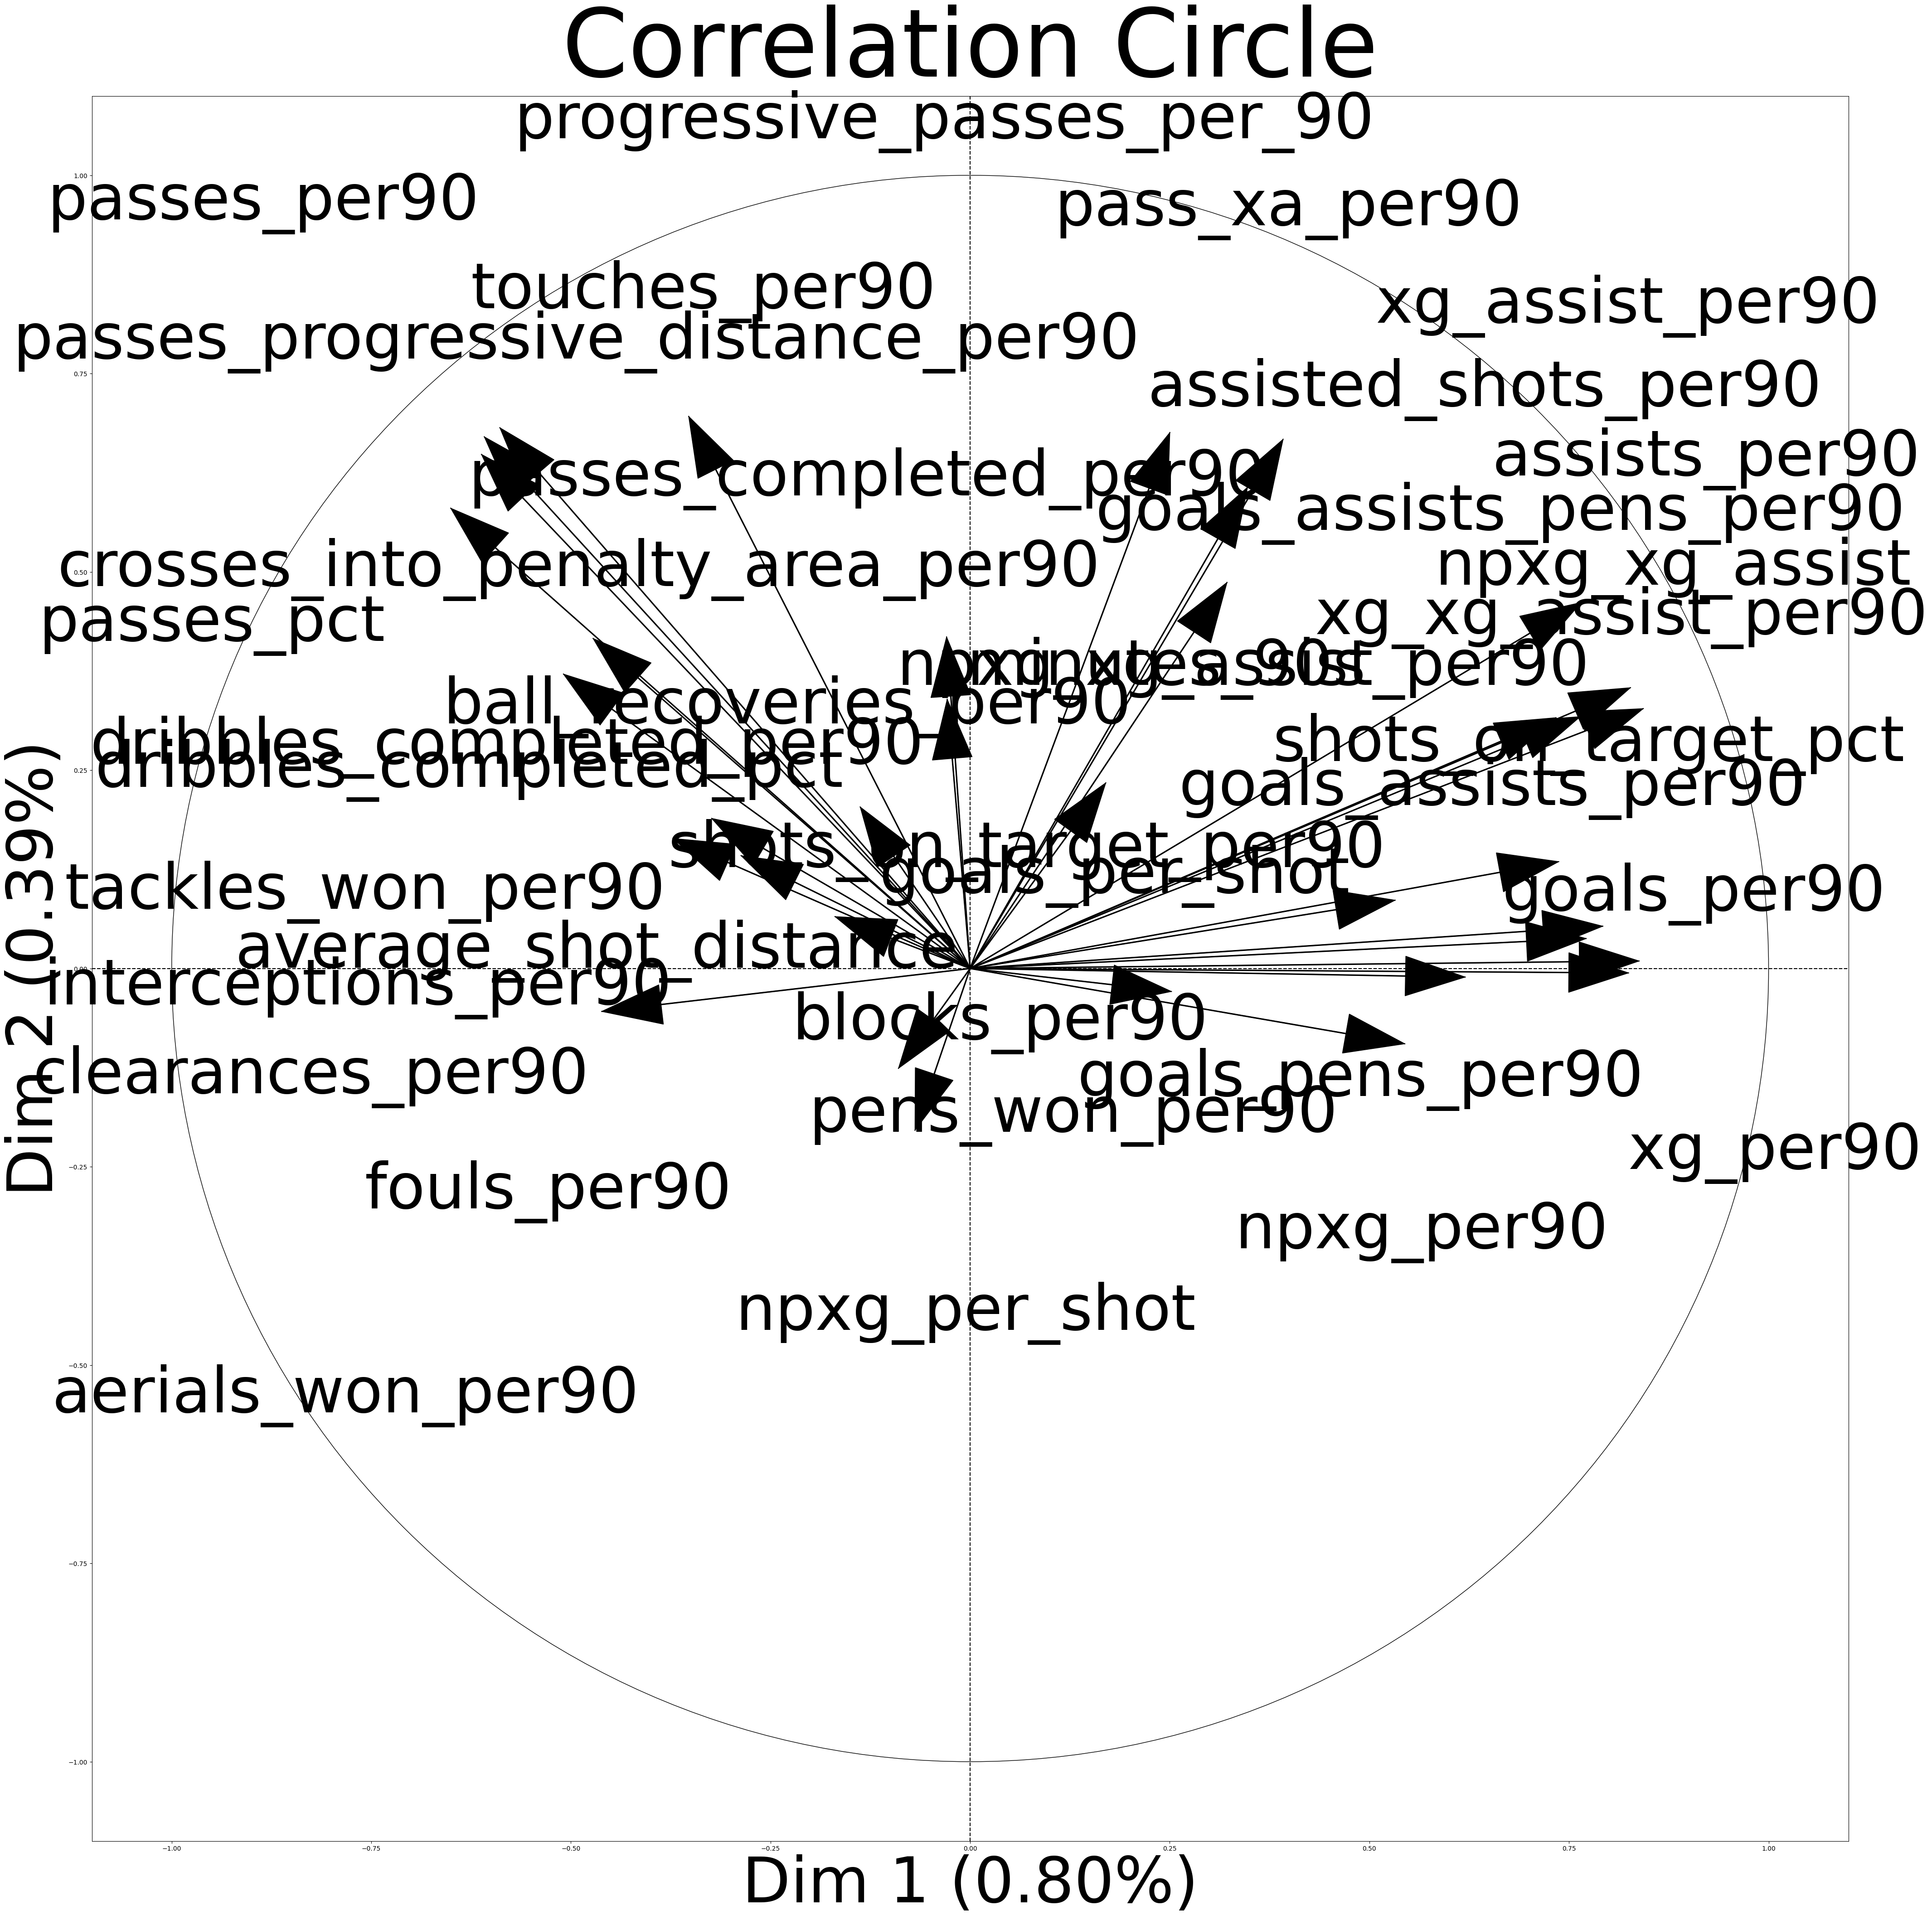

In [102]:
from mlxtend.plotting import plot_pca_correlation_graph

figure, correlation_matrix = plot_pca_correlation_graph( 
                            X = df_to_transform, 
                            variables_names = list(df_to_transform.columns),
                            X_pca = X_proj[['PC1','PC2']],
                            dimensions=(1, 2),
                            explained_variance=pca.explained_variance_ratio_[0:2],
                            figure_axis_size=50
                          )

In [114]:
PC1 = correlation_matrix.sort_values('Dim 1',ascending=False)
PC1['Dim 1']

xg_xg_assist_per90                   0.843140
xg_per90                             0.837958
npxg_xg_assist_per90                 0.827106
npxg_per90                           0.824696
goals_per90                          0.792471
goals_pens_per90                     0.771624
npxg_xg_assist                       0.765332
goals_assists_per90                  0.764209
shots_on_target_per90                0.737222
goals_assists_pens_per90             0.733762
goals_per_shot                       0.620147
npxg_per_shot                        0.544469
shots_on_target_pct                  0.532369
xg_assist_per90                      0.392010
assisted_shots_per90                 0.347532
assists_per90                        0.321780
pens_won_per90                       0.252188
pass_xa_per90                        0.250137
dribbles_completed_per90             0.169934
minutes_90s                         -0.028763
crosses_into_penalty_area_per90     -0.029518
aerials_won_per90                 

In [115]:
PC2 = correlation_matrix.sort_values('Dim 2',ascending=False)
PC2['Dim 2']

progressive_passes_per_90            0.696130
touches_per90                        0.681809
pass_xa_per90                        0.675770
passes_per90                         0.670352
xg_assist_per90                      0.667284
passes_completed_per90               0.648196
assisted_shots_per90                 0.606912
passes_progressive_distance_per90    0.580368
assists_per90                        0.486803
npxg_xg_assist                       0.461460
crosses_into_penalty_area_per90      0.418105
passes_pct                           0.416121
ball_recoveries_per90                0.371203
npxg_xg_assist_per90                 0.354032
minutes_90s                          0.339528
xg_xg_assist_per90                   0.327671
goals_assists_per90                  0.317533
goals_assists_pens_per90             0.316219
dribbles_completed_per90             0.234100
dribbles_completed_pct               0.203686
tackles_won_per90                    0.189271
interceptions_per90               

3 observations can be made :
- PC1 has higher correlations with features related to goals or assists

    => One could this axes 'Ability to be decisive offensively on the final result'
    and will typically outshine strikers
    



- PC2 has higher correlations with features related to passes and balls played in general

     =>One could call this axes 'Volume of plays' and will typically outshine midfielders
     




- Defensive statistics are not very correlated with the first two principal components

    =>This could show that those statistics don't discriminate enough the different players. Defenders may have tendency to all 'look the same' as opposed to strikers. Minor variations in statistics results in these features being not represented in the first two components

    Offcourse, this could also indicate that the dataset does not contain the right data to measure the ability of some defenders to be better than others
    


We can now give a description to our 5 groups of players
    
    - Group1 = Not decisive and low volume of plays
    - Group2 = Not decisive and high volume of plays
    - Group3 = Averagely decisive and high volume of plays 
    - Group4 = Averagely decisive and low volume of plays
    - Group5 = Decisive and high volume of plays
    
Let's add interactive labels on a prettier graph using plotly :

In [166]:
X_proj[['players']] = players[['player']]
X_proj[['age_at_season_start']] = players[['age_at_season_start']]


In [158]:
clusters = []
for i in km.labels_ :
    if i == 3 :
        clusters.append('Not decisive and high volume of plays') 
    elif i == 0 :
        clusters.append('Not decisive and low volume of plays')
    elif i == 2 :
        clusters.append('Averagely decisive and high volume of plays')
    elif i == 1 :
        clusters.append('Decisive and high volume of plays')
    elif i == 4 :
        clusters.append('Averagely decisive and low volume of plays')
        

In [182]:
import plotly.express as px

px.scatter(X_proj, 'PC1', 'PC2', color=clusters, hover_name='players', width=1000, height=600,
           title =  'Projection of WC 2022 players on the two first Principal Components axes',
          color_discrete_sequence=px.colors.qualitative.Safe)

Let's save the DataFrame for later use :

In [54]:
for features in ls :
    players[[feature]] = df_to_transform[[feature]]
    

players.to_pickle('scaled_dataset')